In [129]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [130]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.drop(labels=['RowNumber'], axis=1, inplace=True)

# Cоотношение ушедших и лояльных клиентов

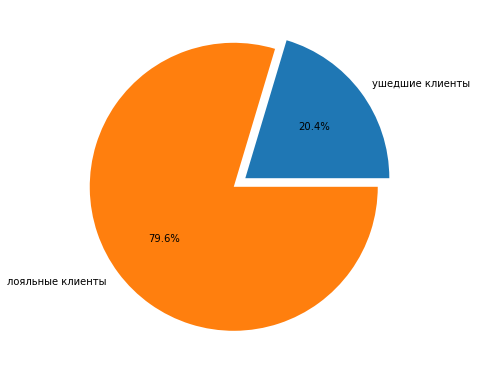

In [131]:
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    churn_data['Exited'].value_counts(ascending=True),
    labels = ['ушедшие клиенты', 'лояльные клиенты'],
    autopct='%.1f%%',
    explode = [0.1, 0]
);

**Вывод:** Пятая часть клиентов банка больше не являются лояльными. 

# Распределение баланса пользователей, у которых на счету больше 2 500 долларов

Text(0, 0.5, 'Количество людей')

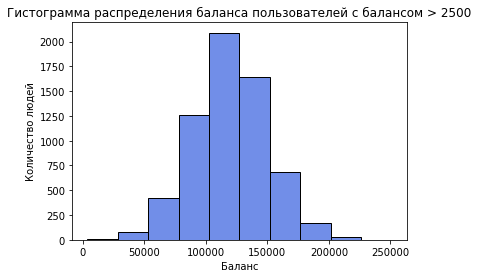

In [132]:
mask_2500 = churn_data[churn_data["Balance"] > 2500]

axes = sns.histplot(
    x=mask_2500["Balance"],
    bins=10,
    color = 'royalblue',
)
axes.set_title("Гистограмма распределения баланса пользователей с балансом > 2500")
axes.set_xlabel("Баланс")
axes.set_ylabel("Количество людей")




**Вывод:** Наиболее часто встречаются клиенты, у которых на балансе в банке лежит сумма в диапазоне 75-150 тыс.дол., причем больше всего пользователей с суммой 100-125 тыс.дол. (порядка 2000).
Наименьшее количество пользователей имеют на своем балансе сумму в диапазонах 2.5-25 и 200-225 тыс.дол.

# Распределение баланса клиента в разрезе признака оттока

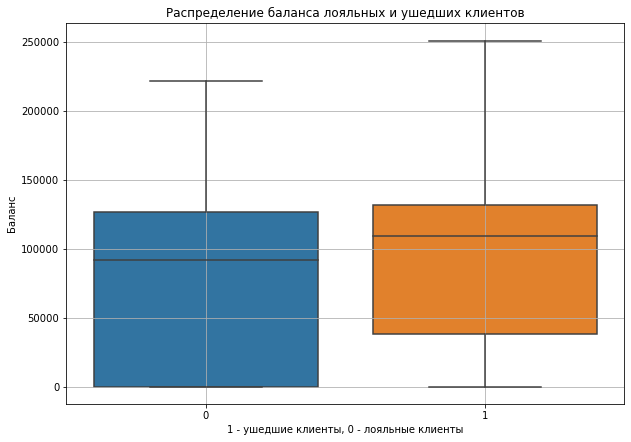

In [133]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=churn_data,
    y='Balance',
    x='Exited'
)
boxplot.set_title('Распределение баланса лояльных и ушедших клиентов');
boxplot.set_xlabel('1 - ушедшие клиенты, 0 - лояльные клиенты');
boxplot.set_ylabel('Баланс');
boxplot.grid()


**Вывод:** У лояльных клиентов банка средняя сумма на счете больше, чем у ушедших, соответственно пользователями банка остаются люди с бОльшим количеством средств на счете. В связи с этим можно предположить возможные причины оттока клиентов: дорогое обслуживание, невысокие проценты вкладов, невыгодные проценты при совершении операций. Разброс суммы баланса в большую сторону имеют лояльные клиенты.

# Распределение возраста в разрезе признака оттока

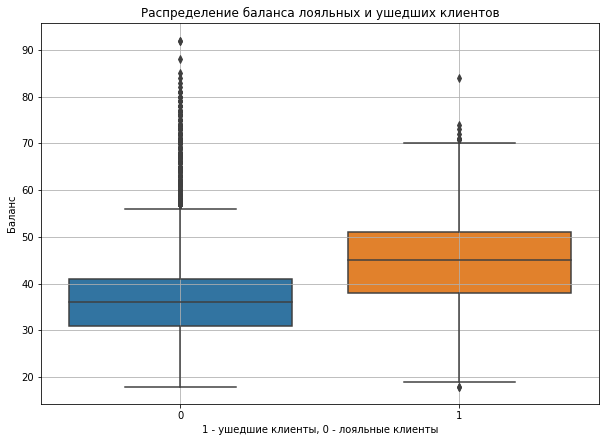

In [134]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=churn_data,
    y='Age',
    x='Exited'
)
boxplot.set_title('Распределение баланса лояльных и ушедших клиентов');
boxplot.set_xlabel('1 - ушедшие клиенты, 0 - лояльные клиенты');
boxplot.set_ylabel('Баланс');
boxplot.grid()

**Выводы:** Основной отток клиентов наблюдается у возрастной группы 40-50 лет.
Средний возраст лояльных клиентов составляет 35 лет (основными пользователями услугами банка являются клиенты в возрасте 30-40 лет).
В группе ушедших клиентов наблюдаются единичные выбросы у возрастных групп менее 20 и в диапазоне 70-85 лет. Выбросы от квартильных значений лояльных клиентов наблюдаются у возрастных групп 55-95 лет.
Наибольший разброс по возрасту имеет категория ушедших клиентов.

# Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты

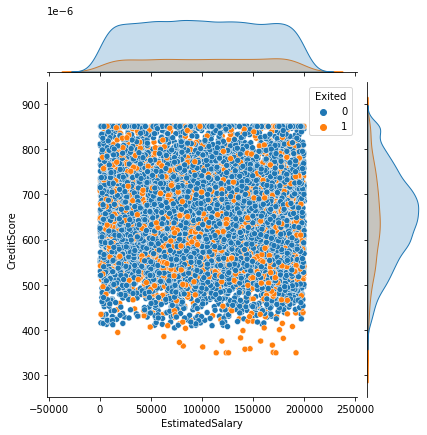

In [135]:
jointplot = sns.jointplot(
    data=churn_data, 
    y='CreditScore', 
    x='EstimatedSalary',
    hue='Exited'
)

**Выводы:** Взаимосвязи между кредитным рейтингом и предполагаемой зарплатой клиента без уточнения категорий (например, возраст или страна) не видно.

# Анализ ухода по гендерному признаку

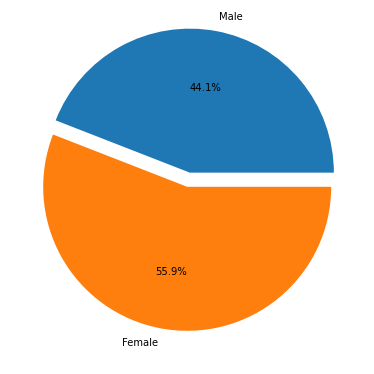

In [136]:
mask_exited = churn_data['Exited'] == 1
churn_data[mask_exited]['Gender'].value_counts(ascending=True)

fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    churn_data[mask_exited]['Gender'].value_counts(ascending=True),
    labels = ['Male', 'Female'],
    autopct='%.1f%%',
    explode = [0.1, 0]
);

**Выводы:** Незначительно больше уходящими клиентами являются женщины. В целом, влияние гендерного признака на причину отказа от услуг банка незаметно.

# Зависимость оттока клиентов от числа приобретённых у банка услуг

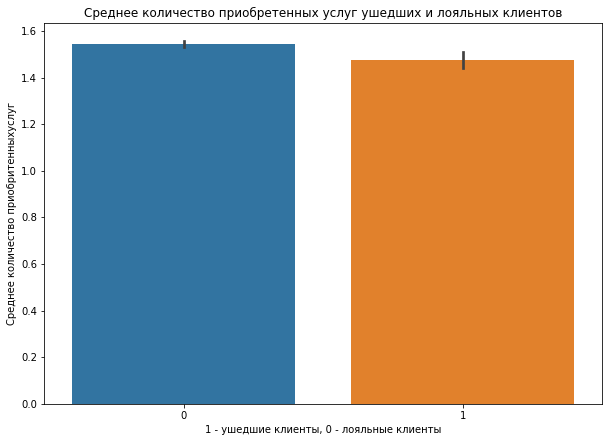

In [137]:
fig = plt.figure(figsize=(10, 7))
barplot = sns.barplot(
    data=churn_data,
    y='NumOfProducts',
    x='Exited',
)
barplot.set_title('Среднее количество приобретенных услуг ушедших и лояльных клиентов');
barplot.set_xlabel('1 - ушедшие клиенты, 0 - лояльные клиенты');
barplot.set_ylabel('Среднее количество приобритенныхуслуг');

**Выводы:** Среднее количество приобретенных услуг у лояльных книентов больше, но незначительно.

# Влияние наличия статуса активного клиента на отток клиентов

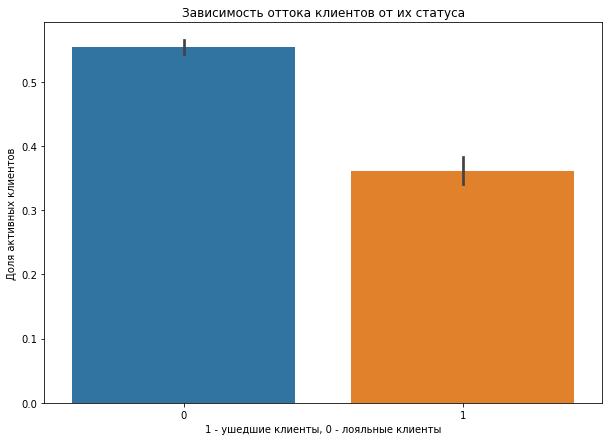

In [138]:
fig = plt.figure(figsize=(10, 7))
barplot = sns.barplot(
    data=churn_data,
    y='IsActiveMember',
    x='Exited',
)
barplot.set_title('Зависимость оттока клиентов от их статуса');
barplot.set_xlabel('1 - ушедшие клиенты, 0 - лояльные клиенты');
barplot.set_ylabel('Доля активных клиентов');

**Выводы:** Наличие активного статуса у клиента оказывает влияние на решение об отказе от услуг банка. Лояльных клиентов, имеющих активный статус, значительно больше, чем ушедших.

# Доля ушедших клиентов в зависимости от страны 

In [139]:
churn_data['Exited_fraction'] = 1 / churn_data['Exited'].count()
churn_data_grouped_Geography = churn_data.groupby('Geography', as_index=False).sum()
churn_data_grouped_Geography
fig = px.choropleth(
    data_frame=churn_data_grouped_Geography,
    locations="Geography",
    locationmode = "country names",
    color="Exited_fraction",
    title='Доля ушедших клиентов по странам', #заголовок
    width=800, #ширина
    height=500, #высота
)
fig.show()

**Выводы:** Половина ушедших клиентов приходится на Францию, В Испании и Германии доли приблизительно равны. Данный факт может быть связан с экономической ситуацией в стране - меньшим заработком людей, с наличием бОльшего количества банков с более выгодными условиями, либо со средним возрастом людей в стране.

# Зависимость количества лет пользования банком от категории кредитного рейтинга

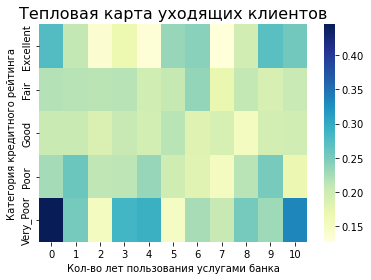

In [140]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

churn_data_pivot = churn_data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='mean'
)

heatmap = sns.heatmap(data=churn_data_pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта уходящих клиентов', fontsize=16);
heatmap.set_xlabel('Кол-во лет пользования услугами банка');
heatmap.set_ylabel('Категория кредитного рейтинга');

**Выводы:** Настоящая тепловая карта отображает доли клиентов, отказывающихся от услуг банка, в зависимости от их категории кредитного рейтинга и и количества лет пользования услугами банка. Из анализа карты можно сделать следующие выводы:
- наибольший отток клиентов наблюдается у категории с наименьшим кредитным рейтингом, особенно с минимальным сроком пользования услугами;
- наименьший отток клиентов наблюдается у категории с высшим рейтингом и со сроками пользования услугами 1-8 лет.
- наименьшее влияние срок пользования услугами оказывывает на категорию клиентов с кредитными рейтингами "Good", "Fair"